<a href="https://colab.research.google.com/github/lcbjrrr/ML315/blob/main/ML315_2B_LinReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AI Process


Overall, the machine learning pipeline is a cyclical process that involves data collection, preparation, model training, evaluation, and refinement to build accurate and reliable machine learning models


**1. Get Data:**

* **Data Collection:** This is the initial stage where relevant data is gathered from various sources such as databases, APIs, or web scraping. The data should be representative of the problem you want to solve.
* **Data Exploration:**  In this step, the collected data is explored to understand its characteristics, including data types, distributions, and potential outliers.


**2. Clean, Prepare, & Manipulate Data:**

* **Data Cleaning:** This involves handling missing values, inconsistencies, and errors in the data. This could include tasks like imputation (filling missing values), normalization (scaling data to a common range), and outlier detection and treatment.
* **Data Preparation:**  This step involves transforming the data into a suitable format for machine learning algorithms. This might include feature engineering (creating new features from existing ones), feature selection (choosing the most relevant features), and data transformation (e.g., one-hot encoding for categorical variables).

**3. Train Model:**

* **Model Selection:**  Choosing the appropriate machine learning algorithm (e.g., linear regression, decision trees, neural networks) based on the problem type and data characteristics.
* **Model Training:**  The selected algorithm is trained on the prepared data. This involves adjusting the model's parameters to minimize the error between its predictions and the actual values.

**4. Test Data:**

* **Model Evaluation:**  The trained model is tested on a separate set of data (the test set) that it hasn't seen during training. This helps assess the model's performance and generalization ability.
* **Model Validation:**  Various metrics are used to evaluate the model's performance, such as accuracy, precision, recall, F1-score, and mean squared error, depending on the problem type.


**5. Improve:**

* **Model Refinement:**  Based on the evaluation results, the model may be refined through techniques like hyperparameter tuning (adjusting the model's parameters), feature engineering, or trying different algorithms.
* **Iterative Process:**  The entire process is often iterative, with improvements leading to further training and testing until satisfactory results are achieved.


![](https://itchronicles.com/wp-content/uploads/2018/10/1.jpg)


# Linear Regression

The dataset contains information about insurance premiums for different individuals. Each row represents an individual with three attributes:

- Age: The age of the individual.
- Gender: The gender of the individual (likely 1 for female, 0 for male).
- Premium: The estimated insurance premium for the individual.

This dataset can be used to analyze how age and gender influence insurance premiums.

In [4]:
import pandas as pd
auto = pd.read_csv('https://raw.githubusercontent.com/lcbjrrr/ML315/refs/heads/main/datasets/autos.csv')
auto.head()

,age,gender,premium
0,23,1,333
1,24,0,320
2,31,1,301
3,33,0,280
4,40,1,270


Linear regression is a statistical method used to model the relationship between a dependent variable and one or more independent variables. It helps us understand how changes in the independent variables affect the dependent variable. Imagine trying to predict a person's height based on their age. Linear regression would help you find the best-fitting line through the data points, allowing you to estimate height based on age.

![](https://cdn.analyticsvidhya.com/wp-content/uploads/2024/09/375512-1.webp)

The score operation calculates the R-squared (R²). R² is a statistical measure that tells us how well a regression line fits the data points. A higher R² value indicates a better fit, meaning the model can explain more of the variation in the data.



In [2]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(auto[['age','gender']],auto['premium'])
print(linreg.coef_,linreg.intercept_)
linreg.score(auto[['age','gender']],auto['premium'])

[-2.56967071  9.01459272] 380.63289428076257
0.9741562690934751


[-2.56967071  9.01459272] 380.63289428076257


0.9741562690934751

 Note that we got the same result from linear algebra...

In [3]:
def predict_premium(age,gender):
  premium =-2.56967071*age+ 9.01459272*gender+ 380.63289428076257
  return premium

print(predict_premium(33,1))
print(predict_premium(33,0))
print(predict_premium(35,1))

304.8483535707626
295.8337608507626
299.70901215076253


Testing data is crucial for evaluating the performance and generalizability of a machine learning model, ensuring it can accurately predict on unseen data


In [5]:

test = pd.read_csv('https://raw.githubusercontent.com/lcbjrrr/ML315/refs/heads/main/datasets/auto_ts.csv')
test

test = pd.DataFrame({
    'age':[33,33,35],
    'gender':[1,0,1],
    'premium':[305,295,300]})
test


,age,gender,premium
0,33,1,305
1,33,0,295
2,35,1,300


You dont have to create your own prediction method, it has already the `predict()`

In [6]:
preds = linreg.predict(test[['age',	'gender']])
preds

array([304.84835355, 295.83376083, 299.70901213])

R-squared (R²) is a statistical measure that represents the proportion of the variance in the dependent variable that is predictable from the independent variables. In simpler terms, it indicates how well the regression model fits the observed data. An R² value of 1 means the model perfectly fits the data, while an R² of 0 means the model does not explain any of the variance.

In [7]:
from sklearn import metrics
test_r2 = metrics.r2_score(test['premium'] , preds)
test_r2

0.9839434458157743

RMSE (Root Mean Square Error) is a measure of the average difference between predicted values and actual values. It's like the average distance between the model's guesses and the real answers. A lower RMSE means the model's predictions are closer to the truth.

![](https://pbs.twimg.com/media/GsI41l8W4AAWSxt?format=png&name=small)

In [8]:
mse = metrics.mean_squared_error(test['premium'] , preds)
print('Test MSE',mse)
print('Test RMSE',mse**(1/2))

Test MSE 0.2676092364037614
Test RMSE 0.5173096136780772


# Statistical Library



Let's redo it with the statsmodel library. So let's fits a linear regression model to predict insurance premiums based on age and gender. It adds a constant term to the independent variables and uses the sm.OLS function to fit the model. The lr.summary() function provides a detailed statistical summary of the model's performance.

In [9]:
import statsmodels.api as sm
auto.head(3)

train = sm.add_constant(auto[['age','gender']])
train.head(2)

lr = sm.OLS(auto['premium'],train).fit()
lr.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                premium   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     885.8
Date:                Mon, 13 Oct 2025   Prob (F-statistic):           4.90e-38
Time:                        15:59:15   Log-Likelihood:                -158.79
No. Observations:                  50   AIC:                             323.6
Df Residuals:                      47   BIC:                             329.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        380.6329      2.749    138.452      0.000     375.102     386.164
age           -2.5697      0.062    -41.310      0.000      -2.695      -2.445
gender         9.0146      1.694      5.321      0.000       5.606      12.423
==============================================================================
Omnibus:                       12.122   Durbin-Watson:                   0.723
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               36.700
Skew:                          -0.254   Prob(JB):                     1.07e-08
Kurtosis:                       7.166   Cond. No.                         139.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Correlation Analysis



A correlation matrix shows the pairwise correlations between numerical columns in the DataFrame. The values in the matrix range from -1 to 1:

- **1**: Perfect positive correlation (as one variable increases, the other increases proportionally).
- **-1**: Perfect negative correlation (as one variable increases, the other decreases proportionally).
- **0**: No correlation (no linear relationship between the variables).

By analyzing the correlation matrix, you can identify relationships between variables, which can be helpful for feature engineering, model selection, and understanding the underlying patterns in your data.


In [10]:
auto.corr()

,age,gender,premium
age,1.000000,-0.066089,-0.979075
gender,-0.066089,1.000000,0.189203
premium,-0.979075,0.189203,1.000000


 A pairplot is a powerful visualization tool that shows pairwise relationships between numerical variables in a dataset. It creates a matrix of scatter plots, where each plot represents the relationship between two variables. The diagonal of the matrix often displays histograms or kernel density plots to visualize the distribution of each variable

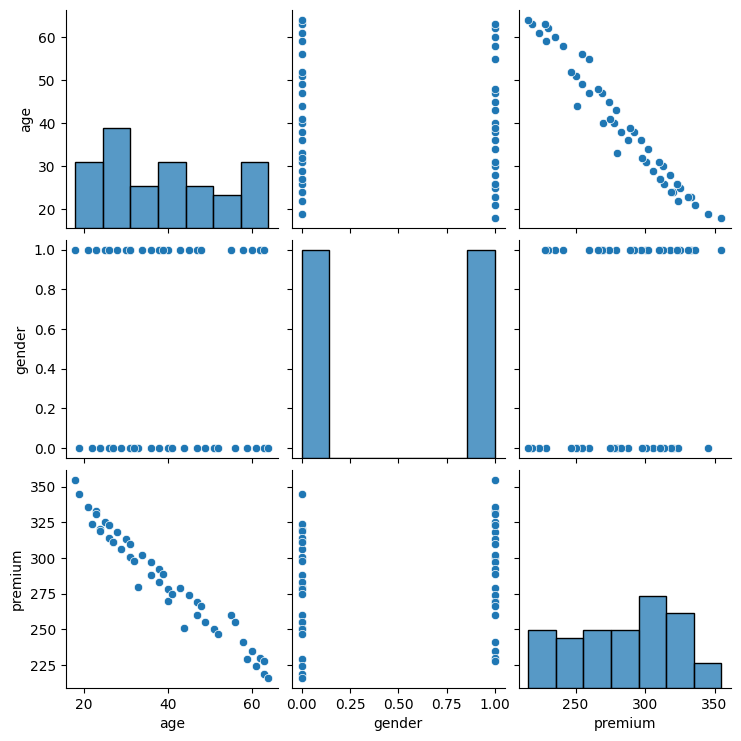

In [11]:
import seaborn as sns
sns.pairplot(auto)

# Residual Analysis



To check the fit of a linear regression model, we examine the residuals, which are the differences between the observed and predicted responses. Small residuals suggest a good model fit. We assess this by looking at a residual plot. If the linear regression model fits well, the plot of residuals versus the predicted values (or an independent variable) should show no clear patterns. The residuals should be randomly scattered around zero


<Axes: ylabel='premium'>

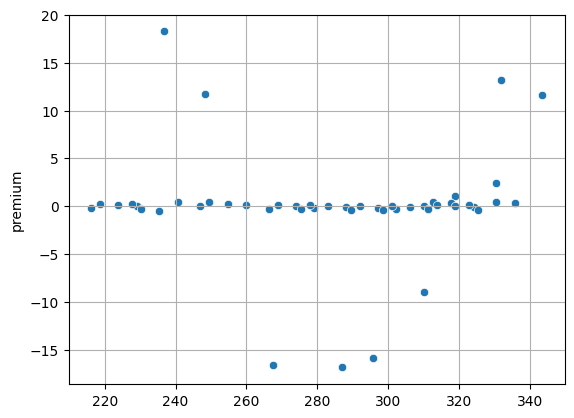

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
tr_preds = linreg.predict(train[['age','gender']])
residuals = auto['premium'] - tr_preds
plt.grid(True)
sns.scatterplot(x=tr_preds,y=residuals)

If a residual plot shows random scatter but isn't centered around zero, it may signal outliers in the data. These are observations significantly different from the main dataset. Such points, often appearing as residuals far from zero in the plot, warrant closer examination.

![](https://pbs.twimg.com/media/GsI7MwYX0AAK5QF?format=jpg&name=small)

Sometimes the relationship between $X$ and $Y$ is not linear but is polynomial in nature, maybe a quadratic or cubic.
The residuals will reveal whether higher order terms in $X$ are needed to fit the data. These polynomial models are still considered simple linear regression models since they are linear in terms of the parameters ($\beta_0$, $\beta_1$, $\beta_2$, $\ldots$), illustrates a case where a quadratic term in $X$ is needed, $X^2$.

![](https://pbs.twimg.com/media/GsI7iPbWEAAqdbw?format=jpg&name=small)

## Normality of the residuals

To check the normality of the residuals, we can plot a histogram or a distribution plot of the residuals. If the residuals are normally distributed, the plot should resemble a bell curve. This indicates that the errors in the model are random and not biased.


/tmp/ipython-input-1972771247.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tr_residuals)


<Axes: xlabel='premium', ylabel='Density'>

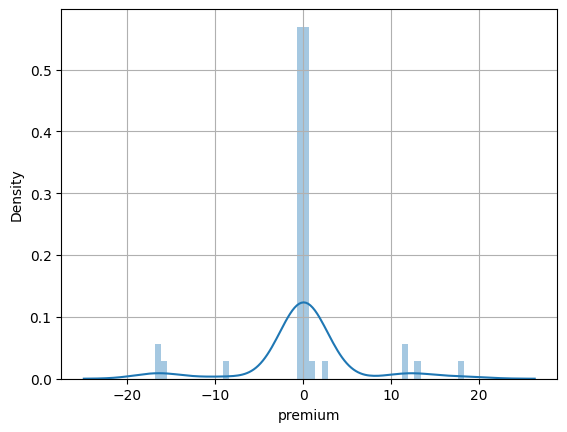

In [18]:
tr_preds = linreg.predict(train[['age','gender']])
tr_residuals = auto['premium'] - tr_preds
plt.grid(True)
sns.distplot(tr_residuals)